# 🍏🍐 Fruit Classifier: Apple vs. Pear

In this project, we will build a simple image classification model that can distinguish between **apples** and **pears**. Images from the [Fruits and Vegetables Image Recognition Dataset](https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition).

## 📚 Importing Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Input
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
tf.config.set_visible_devices([], 'GPU')

2024-11-12 22:24:18.486554: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-12 22:24:18.487086: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 22:24:18.491311: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 22:24:18.497893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731461058.510933   81158 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731461058.51

## 🗃️ Generating the Datasets

### 🏋️‍♂️ Generating the Training Dataset

`ImageDataGenerator()` is configured to apply transformations such as rescaling, rotation, flipping, zoom, and shearing to improve the model's generalization. The images are then loaded from the training image folder (`'archive/train'`) using the `flow_from_directory()` method, resized to 64x64 pixels, organized into batches of 20, and prepared for **binary classification**.

In [2]:
train_data_gen = ImageDataGenerator(rescale = 1./255, rotation_range=7, horizontal_flip=True, zoom_range=0.4, shear_range = 0.2)
path = 'archive/train'
train_data = train_data_gen.flow_from_directory(path, target_size=(64,64), batch_size=20, class_mode='binary', shuffle=True)
print(train_data.class_indices)

Found 157 images belonging to 2 classes.
{'apple': 0, 'pear': 1}


### 🔬 Generating the Test Dataset

In this step, a new dataset is created to evaluate the model's performance.  
We configure the **ImageDataGenerator** with the `rescale` parameter to normalize pixel values between 0 and 1. The `flow_from_directory` method is used to load images from the test folder (`'archive/test'`), resize them to 64x64 pixels to prevent overflow, and classify them in batches of 1 image at a time. Since we don't need the images to be shuffled for testing, we set the `shuffle` parameter to `False`.

In [3]:
path = 'archive/test'
gerador_testes = ImageDataGenerator(rescale=1./255)
test_data = gerador_testes.flow_from_directory(path, target_size=(64,64), batch_size=1, class_mode='binary', shuffle=False)

Found 20 images belonging to 2 classes.


## 🤖 Creating the Neural Network

In this step, we define a **Convolutional Neural Network (CNN)** using Keras' **Sequential** model. We start with an input layer for 64x64 RGB images, followed by **Convolutional** and **MaxPooling** layers to extract and downsample features. After flattening the data, we add **Dense layers** for classification, ending with a **sigmoid activation** for binary output.

Network architecture:


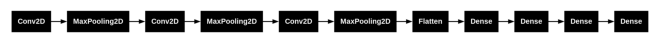

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 577)            │       665,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 577)            │       333,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 577)            │       333,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           578 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,352,263 (5.16 MB)

 Trainable params: 1,352,263 (5.16 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
network = Sequential()

network.add(Input(shape=(64, 64, 3)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPool2D(pool_size=(2, 2)))
network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPool2D(pool_size=(2, 2)))
network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPool2D(pool_size=(2, 2)))

network.add(Flatten())

network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=1, activation='sigmoid'))

print('Network architecture:')

tf.keras.utils.plot_model(network, rankdir="LR", to_file="network_architecture.png")
img = plt.imread("network_architecture.png")
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

network.summary()

### ⚙️ Compiling the Model

The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

In [5]:

network.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

### 🎯 Training the Model

Here, the model is trained using the `fit()` method, with `train_data` as input. The training will run for 100 epochs, allowing the model to adjust its weights and improve accuracy by processing the data repeatedly.

In [6]:
history = network.fit(train_data, epochs=100)

/home/gabriela/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


/usr/lib64/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.4709 - loss: 0.7034
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.6252 - loss: 0.6406
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.8525 - loss: 0.4459
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.8516 - loss: 0.3355
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.9004 - loss: 0.3107
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.8974 - loss: 0.2827
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.9041 - loss: 0.3382
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.8725 - loss: 0.3016
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.9160 - loss: 0.2311
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.9025 - loss: 0.2642
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.9101 - loss: 0.2146
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.8887 - lo

## 📊 Model Performance

### 📈 Training Accuracy

Visualizing the accuracy of the model over the epochs to assess its learning progress. The plot shows how the accuracy improves (or doesn't) as the model trains.


Text(0, 0.5, 'Accuracy')

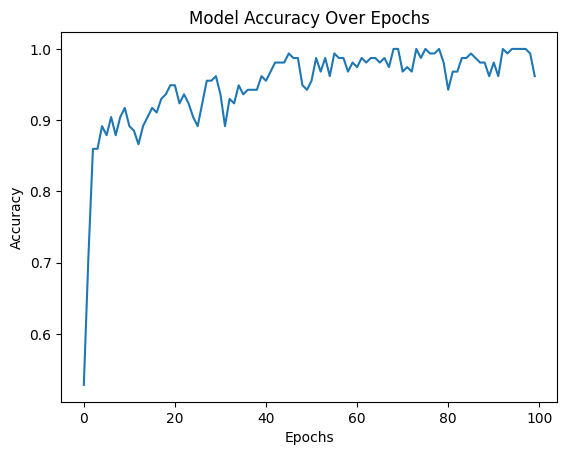

In [7]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### 📉 Model Loss

Visualizing the model's loss over the epochs. In a loss graph, a decline is ideal because we want the network to minimize "dirt" (errors) that could hinder accurate classification.

Text(0, 0.5, 'Loss')

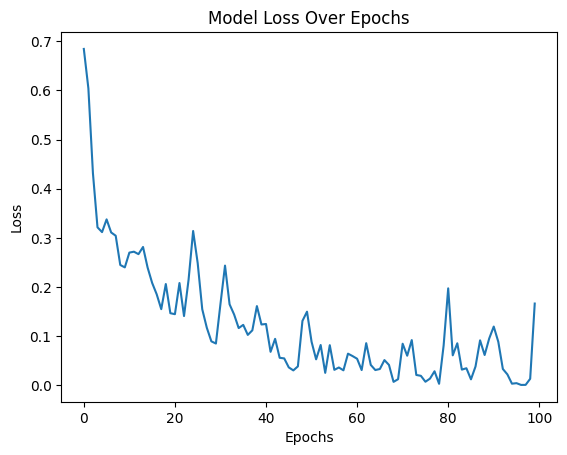

In [8]:
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## 🔮 Making Predictions

Using the trained network to make predictions on the test data. The output is converted into binary values (1 or 0) based on a threshold of 0.5, where values greater than or equal to 0.5 are classified as 1, and those less than 0.5 are classified as 0. The results are stored in a numpy array for further evaluation.

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Predictions:
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]

True Answers:
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]

Accuracy Score:
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



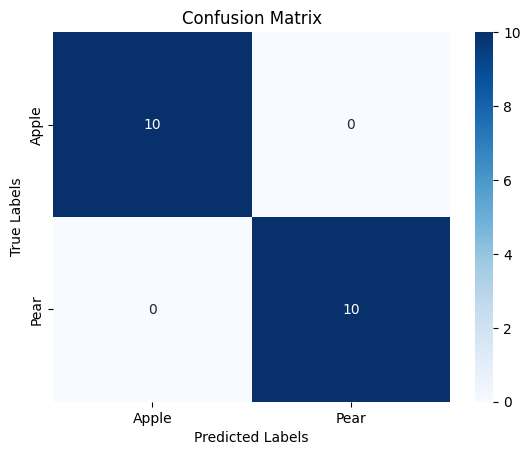

In [9]:
predictions = network.predict(test_data)
predictions = (predictions >= 0.5)
results = []
for answer in predictions:
  if answer:
    results.append(1)
  else:
    results.append(0)
results = np.array(results)
print('\nPredictions:\n',results)
print('\nTrue Answers:\n',test_data.classes)
print('\nAccuracy Score:\n',accuracy_score(test_data.classes, predictions))
print('\nClassification Report:\n', classification_report(test_data.classes, results))

cm = confusion_matrix(test_data.classes, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Apple', 'Pear'], yticklabels=['Apple', 'Pear'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 🖼️ Uploading Image

Loading an image that will be used in the model. The image is read using OpenCV, and its color format is converted from BGR (default in OpenCV) to RGB.

Image: [Apple!](https://commons.wikimedia.org/wiki/File:Apple!.jpg) from Wikimedia Commons

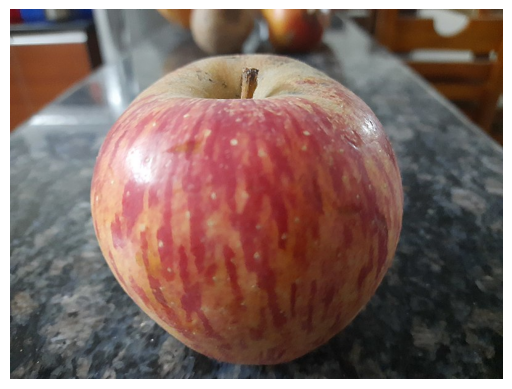

In [10]:
path ='Apple!.jpg'
image = cv2.imread(path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

## 🍏🍐 Image Classification

Processing the image, resizing it, normalizing the pixel values, and reshaping it to fit the model's expected input shape. Then, making a prediction using the trained model to classify the image as either an apple or a pear.

In [11]:
image = cv2.resize(image, (64,64))
image = image /255
image = image.reshape(-1,64,64,3)
answer = network.predict(image)
print('Answer:',int(answer[0][0]))
if answer > 0.5:
    print("It's an pear!")
else:
    print("It's an apple!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Answer: 0
It's an apple!


## 📁 Saving the Model

In [12]:
architecture = network.to_json()
with open("network_pears_apples.json", 'w') as file:
  file.write(architecture)
network_saved = network.save('weights_network_pears_apples.keras')